# 10 Academy: Artificial Intelligence Mastery
# Situational Overview 
# User Overview analysis

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scripts_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\src'
sys.path.append(scripts_dir)
sys.path.append(src_dir)
from connection import DatabaseConnector
from utils import DataUtils



# 1.1 Data Extraction 
# Connect to the database and pandas.

In [2]:
db_connector = DatabaseConnector()

# Connect to the database
db_connector.connect()

# Define and execute a query
query = "SELECT * FROM xdr_data;"
df = db_connector.execute_query(query)

# Print the DataFrame
if df is not None:
    print(df)
db_connector.close_connection()
print("Columns in DataFrame:", df.columns)


Connection successful.
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \


# 1.2 Data Cleansing 
# Missing Value, Outliers, and data conversion  

In [3]:
data_utils = DataUtils(df)
missing_summary = data_utils.check_missing_values()
print("Missing Values Summary:\n", missing_summary)


Total columns with missing values: 41
Top 5 columns with the most missing values:
                                          Missing Values Percentage    Dtype
Nb of sec with 37500B < Vol UL                    130254      86.8%  float64
Nb of sec with 6250B < Vol UL < 37500B            111843      74.6%  float64
Nb of sec with 125000B < Vol DL                    97538      65.0%  float64
TCP UL Retrans. Vol (Bytes)                        96649      64.4%  float64
Nb of sec with 31250B < Vol DL < 125000B           93586      62.4%  float64
Missing Values Summary:
                                           Missing Values Percentage    Dtype
Nb of sec with 37500B < Vol UL                    130254      86.8%  float64
Nb of sec with 6250B < Vol UL < 37500B            111843      74.6%  float64
Nb of sec with 125000B < Vol DL                    97538      65.0%  float64
TCP UL Retrans. Vol (Bytes)                        96649      64.4%  float64
Nb of sec with 31250B < Vol DL < 125000B      

Columns with more than 50% missing data frequently offer incomplete information, which, if imputed, might distort the analysis and add noise. High missingness might be a sign of issues with data collection, and dealing with such columns can make analysis more difficult without bringing much benefit. These columns can be eliminated so that more comprehensive and trustworthy data can be examined, which would increase statistical efficiency and provide clearer, more accurate insights.

For investors, this means decisions based on such incomplete or unreliable data may lead to suboptimal investment choices or missed opportunities.

Investment Risk: Relying on datasets with substantial missing values can introduce uncertainty and increase investment risk. Investors might end up underestimating potential risks or overvaluing opportunities due to gaps in the data.

# 1.3 Handling Missing Value 
handles skewness in the handle_missing_values method, where it decides whether to fill missing values with the median or mean based on the skewness of the distribution of the numeric columns.

In [4]:
df = data_utils.handle_missing_values()
df.head()

Missing values handled and high missing value columns dropped.


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 1.5 Outliers , Fix( Median, Mean) and Remove Based on Z Score 

In [5]:

outliers = data_utils.detect_outliers()

for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices[:5]}")  # Show first 5 outlier indices

df = data_utils.fix_outliers()
df = data_utils.remove_outliers()
df.head()

Outlier detection complete.
Outliers in column 'Bearer Id': Index([], dtype='int64')
Outliers in column 'Start ms': Index([], dtype='int64')
Outliers in column 'End ms': Index([], dtype='int64')
Outliers in column 'Dur. (ms)': Index([0, 1, 2, 3, 4], dtype='int64')
Outliers in column 'IMSI': Index([27541, 100027, 125042], dtype='int64')
Outliers in column 'MSISDN/Number': Index([125042, 126060], dtype='int64')
Outliers in column 'IMEI': Index([], dtype='int64')
Outliers in column 'Avg RTT DL (ms)': Index([467, 505, 516, 517, 596], dtype='int64')
Outliers in column 'Avg RTT UL (ms)': Index([58, 72, 184, 472, 595], dtype='int64')
Outliers in column 'Avg Bearer TP DL (kbps)': Index([86, 323, 405, 538, 557], dtype='int64')
Outliers in column 'Avg Bearer TP UL (kbps)': Index([132, 317, 331, 379, 539], dtype='int64')
Outliers in column 'TCP DL Retrans. Vol (Bytes)': Index([538, 786, 902, 923, 1067], dtype='int64')
Outliers in column 'TCP UL Retrans. Vol (Bytes)': Index([566, 821, 1246, 1381, 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,86399.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,86399.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,86399.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,86399.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,455841077.5
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,500.0,86399.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 1.6 Data Conversion  
Converting columns with bytes to megabytes 
This is done by reading columns titled "(Bytes)"

In [6]:
df = data_utils.convert_bytes_to_megabytes()

Converted byte columns to megabytes.


# 2. User Overview Analysis 

# Task 2.1 

2.1.1 Top 10 Handsets Used by Customers

In [7]:
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_handsets)


Top 10 Handsets Used by Customers:
Handset Type
Apple iPhone 6S (A1688)         8201
undefined                       7620
Apple iPhone 6 (A1586)          7618
Apple iPhone 7 (A1778)          5184
Apple iPhone Se (A1723)         4577
Apple iPhone 8 (A1905)          4193
Huawei B528S-23A                3883
Apple iPhone Xr (A2105)         3768
Samsung Galaxy S8 (Sm-G950F)    3583
Samsung Galaxy J5 (Sm-J530)     3415
Name: count, dtype: int64


2.1.2  Top 3 Handset Manufacturers

In [8]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      50335
Samsung    34239
Huawei     13912
Name: count, dtype: int64


2.1.3 Top 5 Handsets Per Top 3 Handset Manufacturer

In [9]:
top_manufacturers_list = top_manufacturers.index
for manufacturer in top_manufacturers_list:
    subset = df[df['Handset Manufacturer'] == manufacturer]
    top_handsets_per_manufacturer = subset['Handset Type'].value_counts().head(5)
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_handsets_per_manufacturer)


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    8201
Apple iPhone 6 (A1586)     7618
Apple iPhone 7 (A1778)     5184
Apple iPhone Se (A1723)    4577
Apple iPhone 8 (A1905)     4193
Name: count, dtype: int64
Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3583
Samsung Galaxy J5 (Sm-J530)     3415
Samsung Galaxy A5 Sm-A520F      3288
Samsung Galaxy J3 (Sm-J330)     3163
Samsung Galaxy S7 (Sm-G930X)    2673
Name: count, dtype: int64
Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  3518
Huawei P20 Lite Huawei Nova 3E    1755
Huawei P20                        1214
Huawei Y6 2018                     908
Huawei P20 Pro                     762
Name: count, dtype: int64


2.1.4 Recommendation for the marketing team 

In order to maximize marketing efforts, launch iOS-exclusive features and tailored promotions with an emphasis on Apple consumers, who significantly dominate device usage. Give priority to Samsung smartphones in marketing campaigns, emphasizing well-liked models such as the Galaxy S8 and Galaxy J5, and take into account exclusive offers aimed at catering to both high-end and mid-range consumers. Examine and resolve the "undefined" handset category in order to enhance targeting and accuracy of data. For Huawei, develop marketing plans aimed at mid-range smartphone buyers, emphasizing well-liked products like the P20 Lite and Y6 2018. These focused strategies will increase user participation and boost marketing efficacy for various user groups.

2.1.5 User Behavior Analysis

user behavior can be tracked through the following applications:  Social Media, Google, Email, YouTube, Netflix, Gaming, and others. 

Key metrics are computed to aggregate data per user (identified by IMSI), such as the total number of xDR sessions, the length of the session, and the download (DL) and upload (UL) of data from several applications (such YouTube and Social Media). In addition, a comprehensive summary of every user's activity, session count, and data consumption is provided by computing the overall data volume.



Bar Plot

Converted byte columns to megabytes.


AttributeError: 'Axes' object has no attribute 'setTitle'

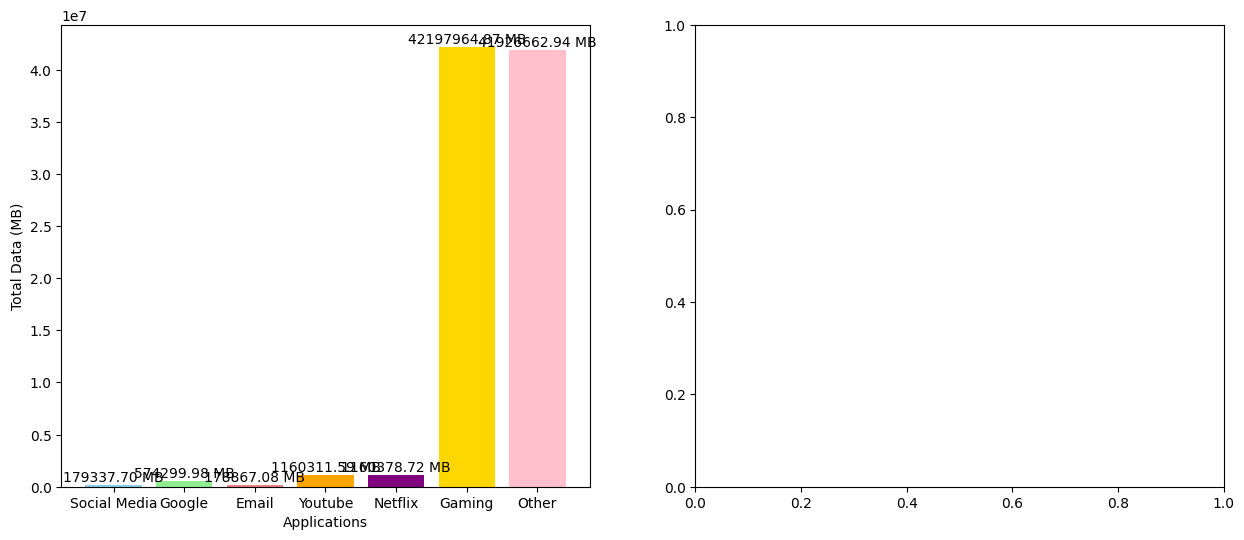

In [10]:
df = data_utils.convert_bytes_to_megabytes()

applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
aggregated_data = pd.DataFrame()

for app in applications:
    app_dl_col = f'{app} DL (MB)'
    app_ul_col = f'{app} UL (MB)'
    
    # Number of xDR sessions
    aggregated_data[f'{app} xDR Sessions'] = df.groupby('IMSI').size()
    # Session duration
    aggregated_data[f'{app} Session Duration (ms)'] = df.groupby('IMSI')['Dur. (ms)'].sum()
    # Total download data in MB
    aggregated_data[f'{app} Total DL (MB)'] = df.groupby('IMSI')[app_dl_col].sum()
    # Total upload data in MB
    aggregated_data[f'{app} Total UL (MB)'] = df.groupby('IMSI')[app_ul_col].sum()

# Total data volume in MB
aggregated_data['Total DL (MB)'] = aggregated_data[[f'{app} Total DL (MB)' for app in applications]].sum(axis=1)
aggregated_data['Total UL (MB)'] = aggregated_data[[f'{app} Total UL (MB)' for app in applications]].sum(axis=1)

# Define colors for each application
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'gold', 'pink']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Data for Total Download (MB) by Application
total_dl_data = [aggregated_data[f'{app} Total DL (MB)'].sum() for app in applications]
data_utils.plot_bar_with_annotations(ax1, total_dl_data, applications, 'Total Download Data (MB) by Application', colors)

# Data for Total Upload (MB) by Application
total_ul_data = [aggregated_data[f'{app} Total UL (MB)'].sum() for app in applications]
data_utils.plot_bar_with_annotations(ax2, total_ul_data, applications, 'Total Upload Data (MB) by Application', colors)

# Adjust layout
plt.tight_layout()
plt.show()

# 2.2 Exploratory Data Analysis(EDA) 


2.2.1 Describe Relevant Variables and Data Types


In [14]:
print(df.dtypes)
print(df.describe(include='all'))

Bearer Id         float64
Start              object
Start ms          float64
End                object
End ms            float64
                   ...   
Gaming UL (MB)    float64
Other DL (MB)     float64
Other UL (MB)     float64
Total UL (MB)     float64
Total DL (MB)     float64
Length: 75, dtype: object
           Bearer Id           Start       Start ms             End  \
count   1.099040e+05          109904  109904.000000          109904   
unique           NaN            9731            NaN            6356   
top              NaN  4/26/2019 7:25            NaN  4/25/2019 0:01   
freq             NaN             170            NaN             883   
mean    9.617335e+18             NaN     476.314101             NaN   
std     2.828116e+18             NaN     267.383321             NaN   
min     6.917538e+18             NaN       0.000000             NaN   
25%     7.349883e+18             NaN     251.000000             NaN   
50%     7.349883e+18             NaN     499.0000

2.2.2 Variable Transformations

In [15]:
# Compute total duration and data
df['Total Duration (ms)'] = df['Dur. (ms)']  # Assuming 'Dur. (ms)' is the session duration column
df['Total Data (MB)'] = df[['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)',
                            'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 
                            'Other DL (MB)', 'Social Media UL (MB)', 'Google UL (MB)', 
                            'Email UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)', 
                            'Gaming UL (MB)', 'Other UL (MB)']].sum(axis=1)

# Segment into deciles based on duration
df['Decile'] = pd.qcut(df['Total Duration (ms)'], 10, labels=False)

# Compute total data per decile
decile_summary = df.groupby('Decile')['Total Data (MB)'].sum().reset_index()
print(decile_summary)


   Decile  Total Data (MB)
0       0     9.109102e+06
1       1     9.097882e+06
2       2     9.204231e+06
3       3     1.709724e+07
4       4     1.507812e+06
5       5     8.845402e+06
6       6     9.135348e+06
7       7     9.162254e+06
8       8     9.184977e+06
9       9     9.138984e+06


2.2.3 Analyze Basic Metrics

In [16]:
# Compute basic statistics
basic_metrics = df[['Total DL (MB)', 'Total UL (MB)', 'Total Data (MB)']].agg(['mean', 'median', 'std', 'min', 'max'])
print(basic_metrics)


        Total DL (MB)  Total UL (MB)  Total Data (MB)
mean       414.918630      38.141681       832.392194
median     434.723928      39.232920       833.844319
std        215.277273       9.481589       304.483404
min          8.418161       9.603327        55.658620
max        795.638669      56.971464      1601.367257


2.2.4 Non-Graphical Univariate Analysis 


In [17]:
quantitative_vars = df.select_dtypes(include=[np.number]).columns

# Compute and display statistical summaries
statistics = data_utils.compute_statistics(quantitative_vars)
print(statistics)

                       Bearer Id      Start ms        End ms     Dur. (ms)  \
Mean                9.617335e+18    476.314101    475.552491  9.740097e+04   
Median              7.349883e+18    499.000000    500.000000  8.640000e+04   
Standard Deviation  2.828116e+18    267.383321    267.229853  5.158560e+04   
Variance            7.998243e+36  71493.840331  71411.794120  2.661074e+09   
Minimum             6.917538e+18      0.000000      0.000000  7.142000e+03   
Maximum             1.311448e+19    950.000000    947.000000  2.380560e+05   
25th Percentile     7.349883e+18    251.000000    251.000000  5.914175e+04   
75th Percentile     1.304243e+19    700.000000    700.000000  1.334452e+05   

                            IMSI  MSISDN/Number          IMEI  \
Mean                2.082014e+14   3.366678e+10  4.047366e+13   
Median              2.082015e+14   3.366354e+10  3.566091e+13   
Standard Deviation  4.440338e+08   3.765502e+07  1.536518e+13   
Variance            1.971660e+17   1.

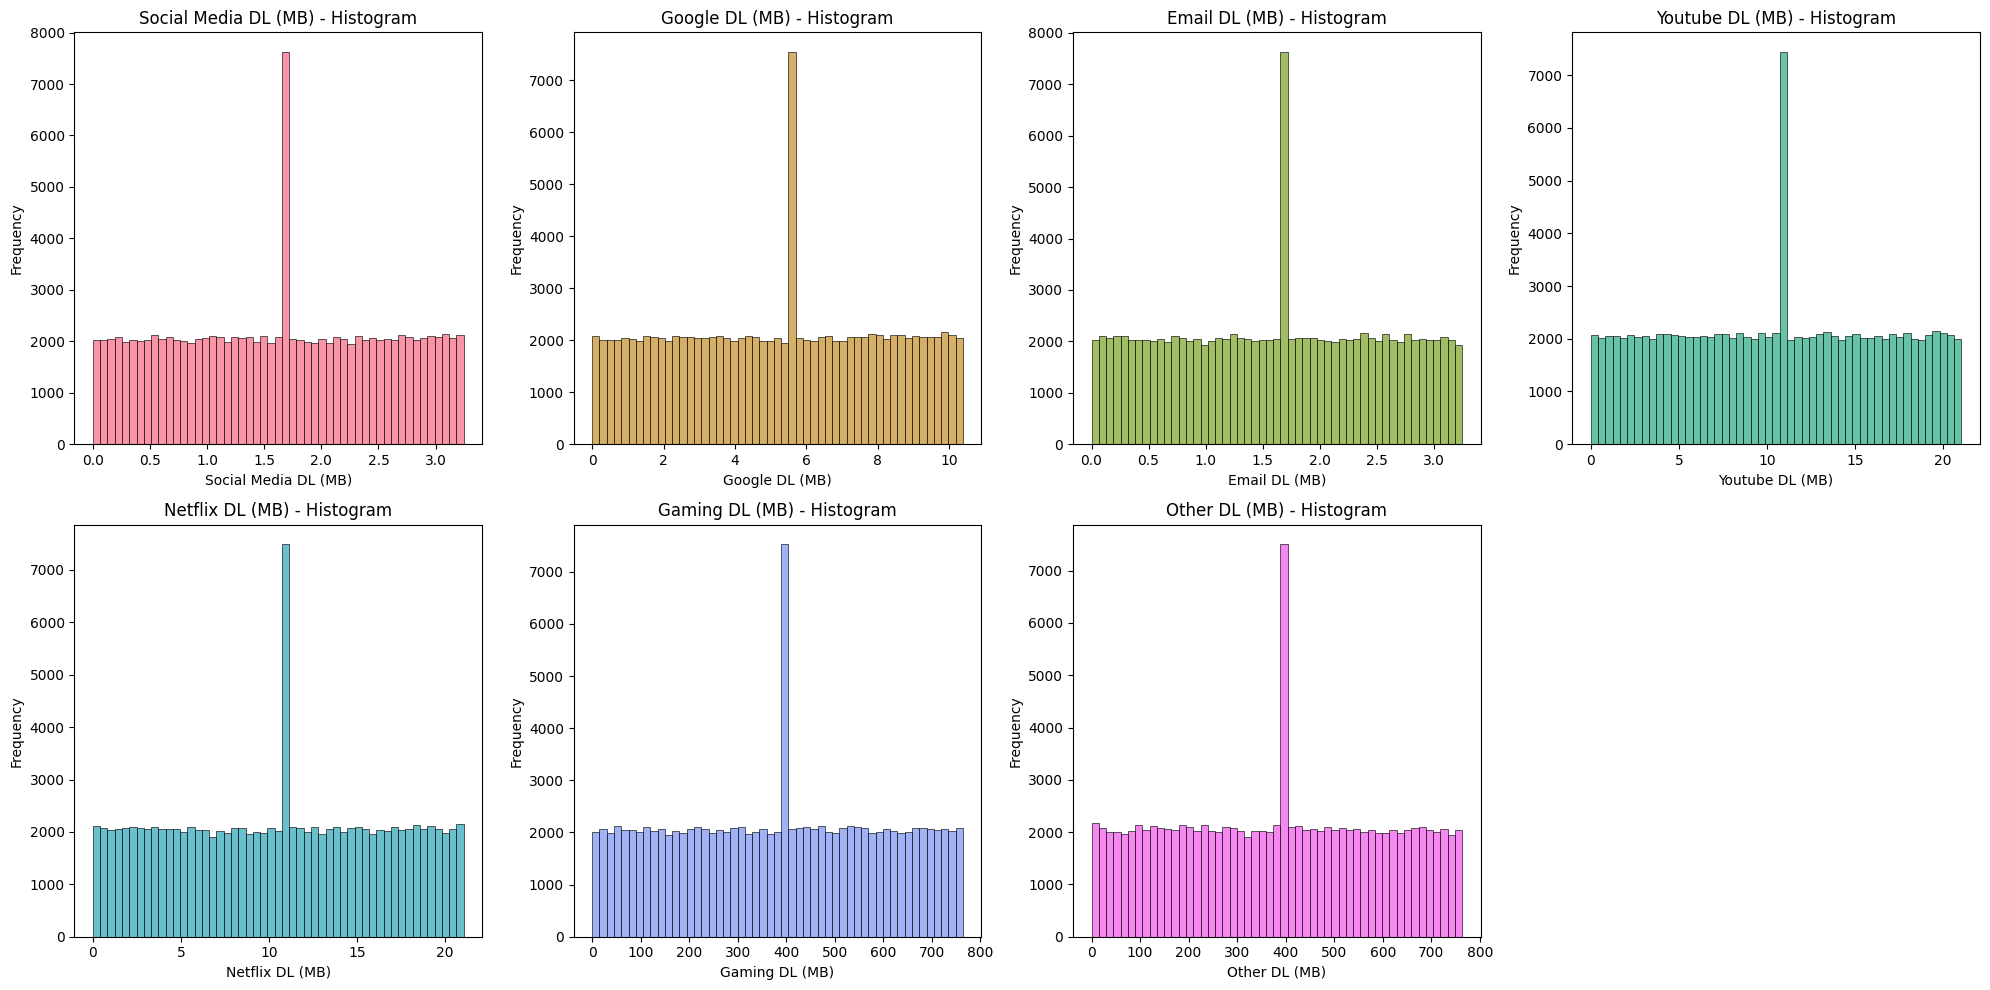

In [23]:
variables_to_analyze = ['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)', 
                        'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)']

# Perform graphical univariate analysis
data_utils.plot_univariate_analysis(variables_to_analyze)


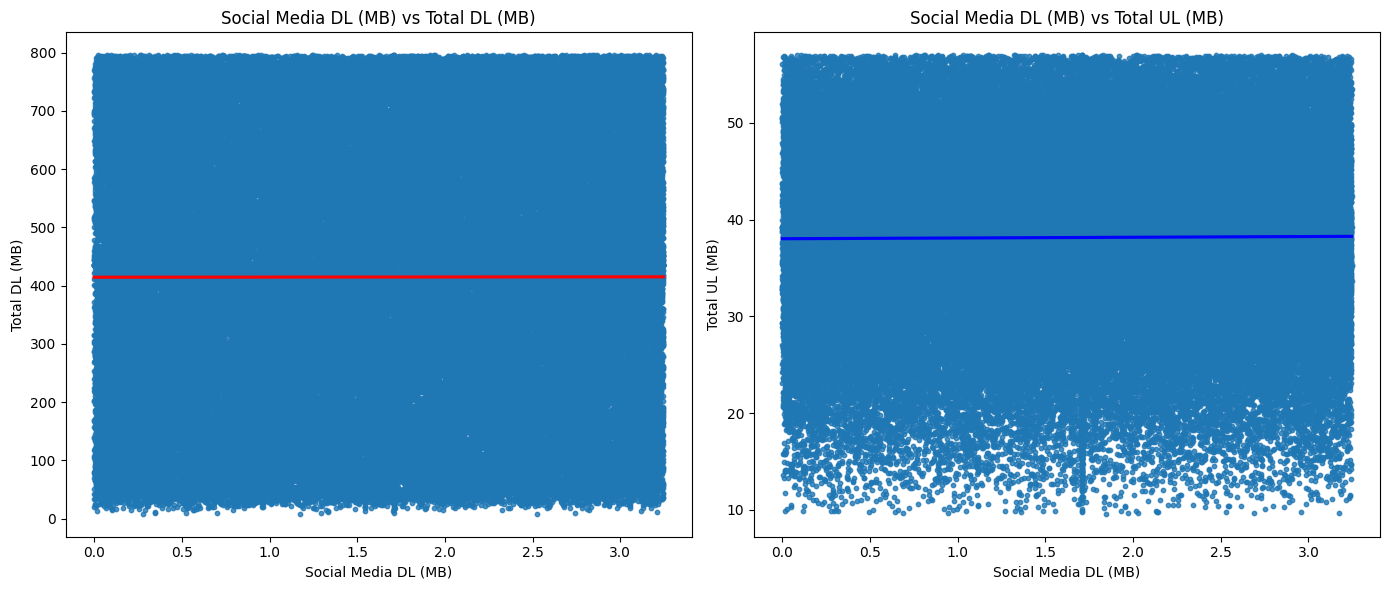

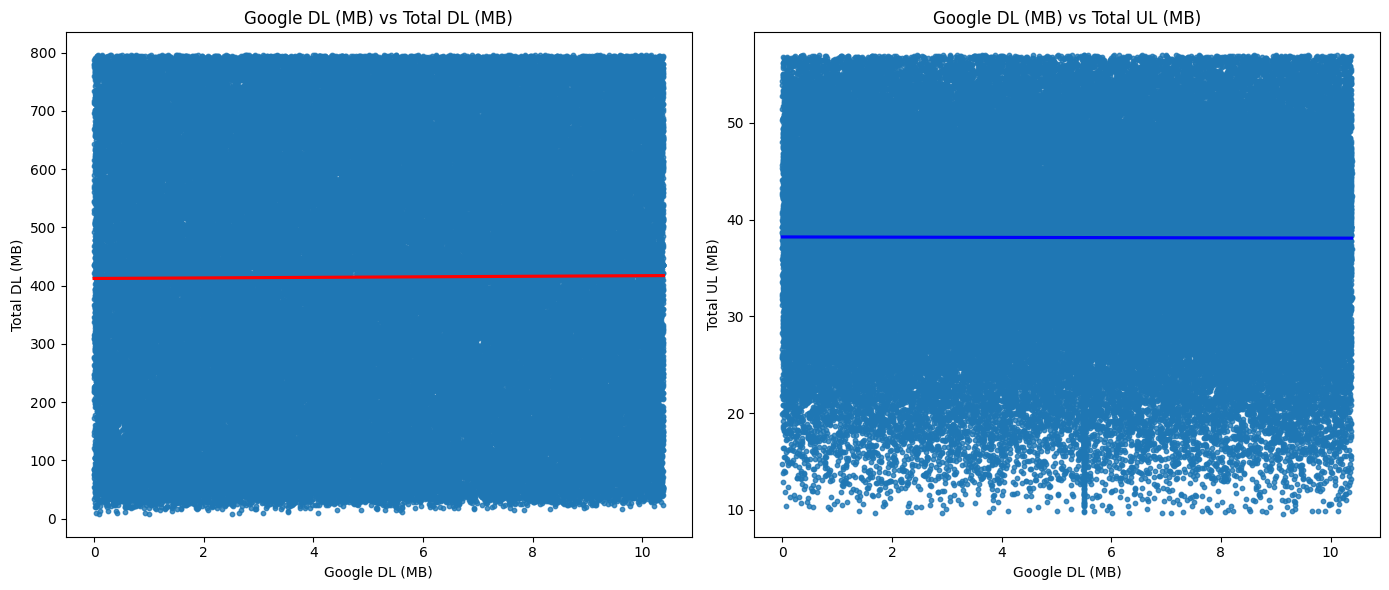

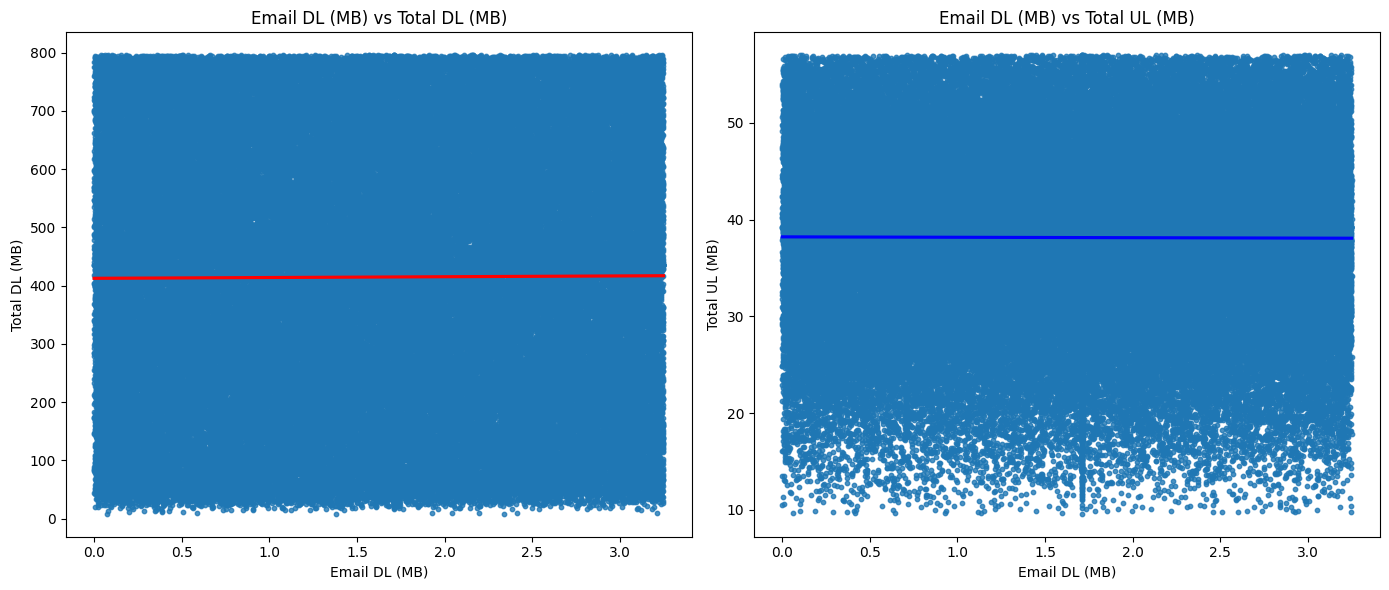

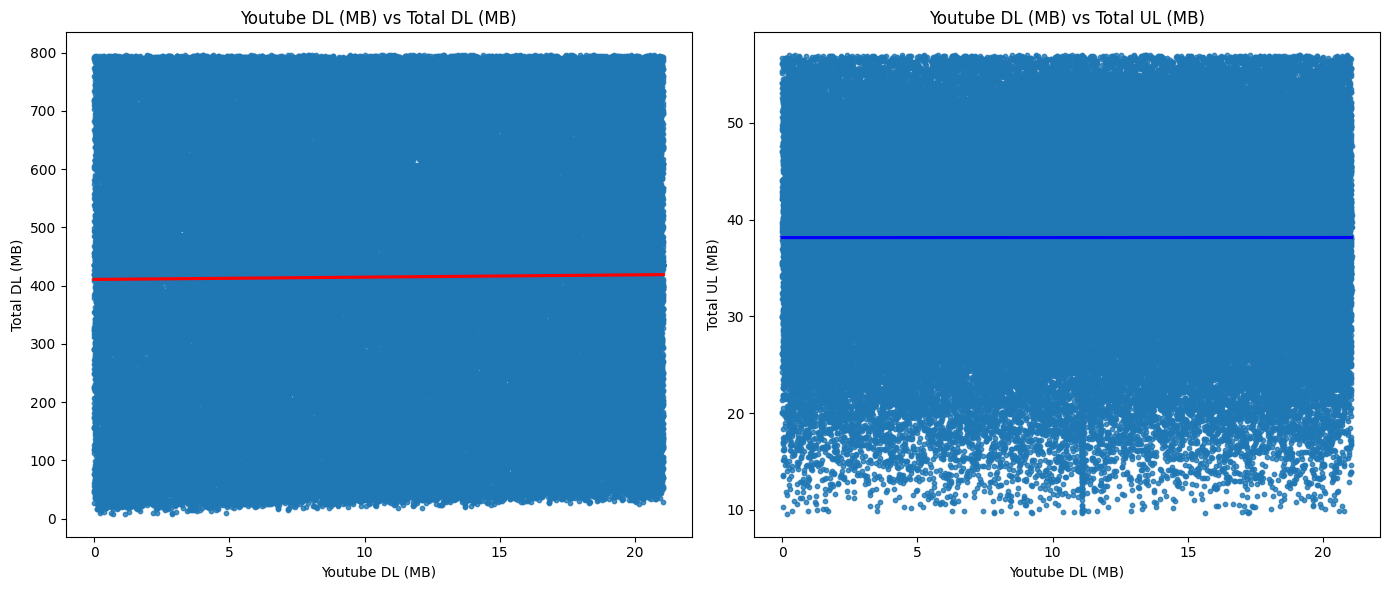

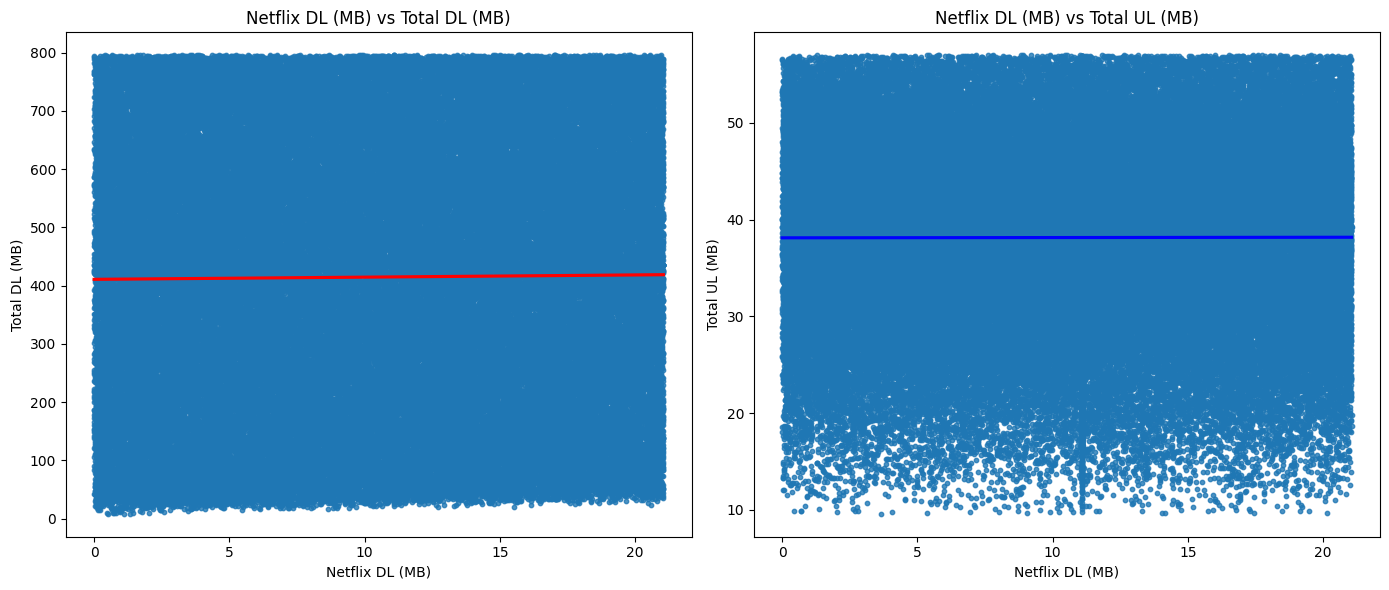

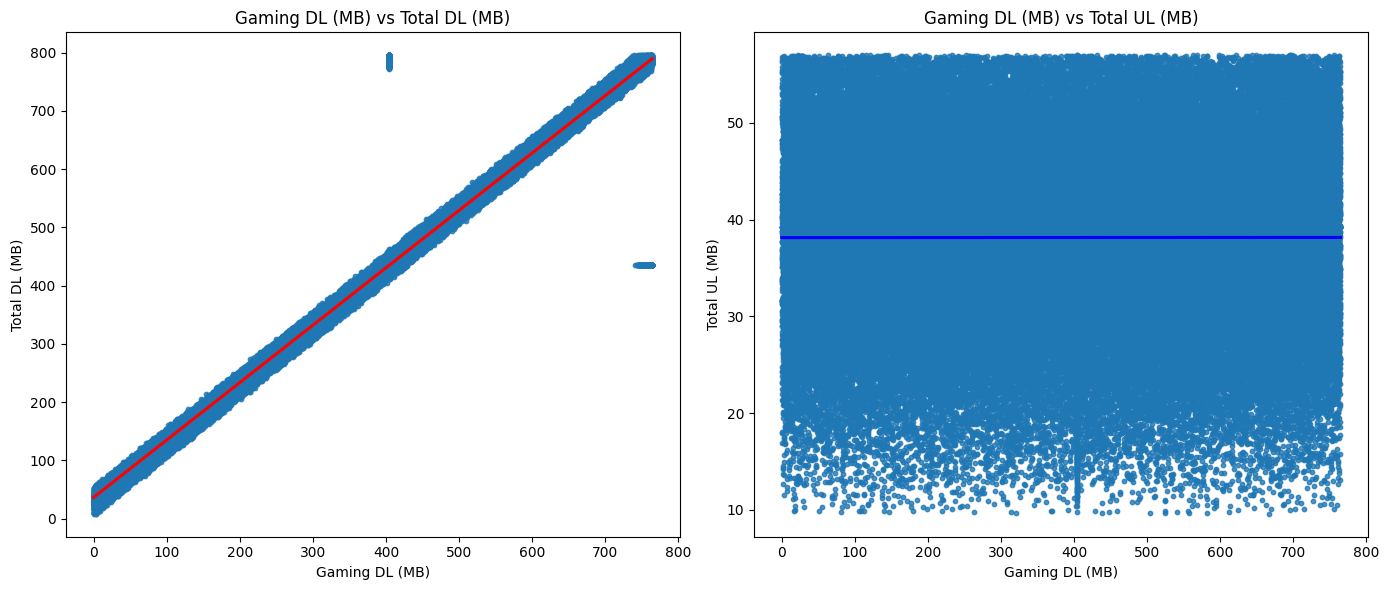

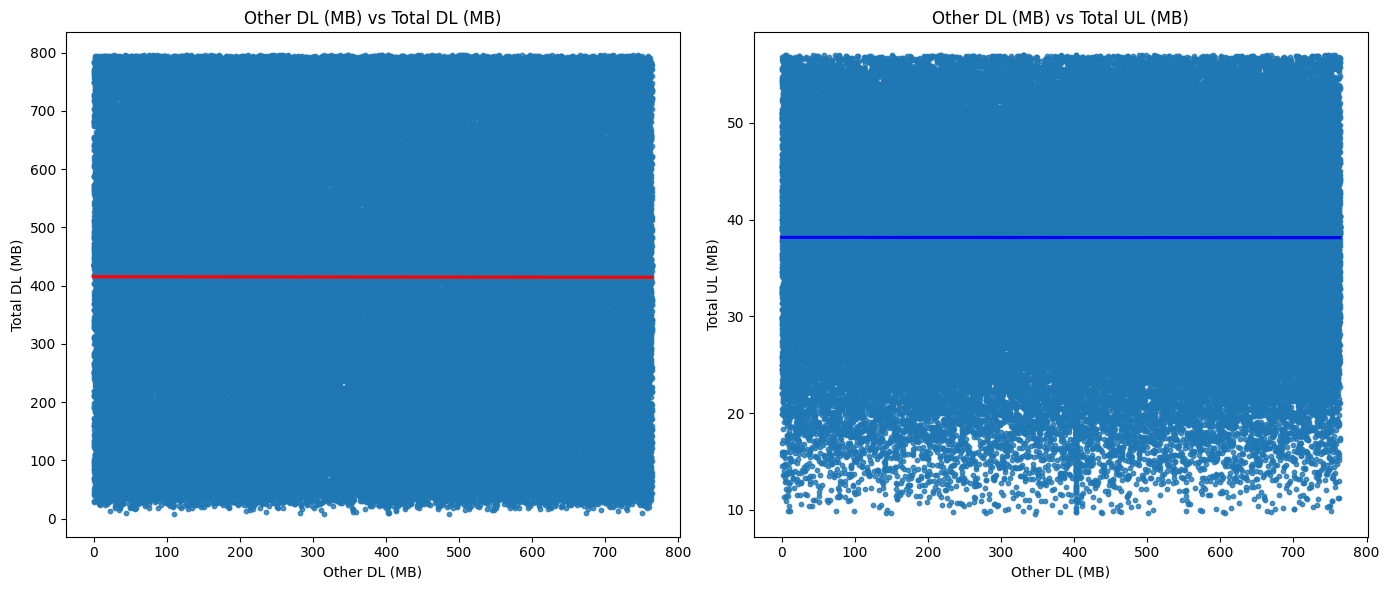

                      Correlation with Total DL (MB)  \
Social Media DL (MB)                        0.000908   
Google DL (MB)                              0.006467   
Email DL (MB)                               0.005801   
Youtube DL (MB)                             0.010819   
Netflix DL (MB)                             0.010448   
Gaming DL (MB)                              0.985238   
Other DL (MB)                              -0.001264   

                      Correlation with Total UL (MB)  
Social Media DL (MB)                        0.007274  
Google DL (MB)                             -0.003701  
Email DL (MB)                              -0.004148  
Youtube DL (MB)                             0.000213  
Netflix DL (MB)                             0.001775  
Gaming DL (MB)                              0.000601  
Other DL (MB)                              -0.000776  


In [18]:

total_dl_col = 'Total DL (MB)'
total_ul_col = 'Total UL (MB)'

# Perform bivariate analysis
bivariate_results = data_utils.bivariate_analysis(variables_to_analyze, total_dl_col, total_ul_col)

print(bivariate_results)


In [24]:
# Compute correlation matrix
correlation_matrix = df[['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)',
                         'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)',
                         'Other DL (MB)', 'Social Media UL (MB)', 'Google UL (MB)',
                         'Email UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)',
                         'Gaming UL (MB)', 'Other UL (MB)']].corr()
print(correlation_matrix)



                      Social Media DL (MB)  Google DL (MB)  Email DL (MB)  \
Social Media DL (MB)              1.000000       -0.005939       0.002162   
Google DL (MB)                   -0.005939        1.000000      -0.001247   
Email DL (MB)                     0.002162       -0.001247       1.000000   
Youtube DL (MB)                  -0.005894        0.001337       0.004123   
Netflix DL (MB)                  -0.002504        0.003769       0.003051   
Gaming DL (MB)                   -0.001562       -0.000392       0.004519   
Other DL (MB)                     0.005013       -0.001284      -0.001291   
Social Media UL (MB)              0.003434        0.004546       0.005178   
Google UL (MB)                    0.000844        0.000449       0.000471   
Email UL (MB)                    -0.001982       -0.000349       0.005954   
Youtube UL (MB)                   0.003505       -0.001463      -0.002446   
Netflix UL (MB)                   0.002490       -0.003110      -0.000404   

In [26]:
# Prepare data for PCA
features = ['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)',
            'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)',
            'Other DL (MB)', 'Social Media UL (MB)', 'Google UL (MB)', 
            'Email UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)', 
            'Gaming UL (MB)', 'Other UL (MB)']
x = df[features].dropna()
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_

print(f'Explained Variance Ratio: {explained_variance}')
print(f'Principal Components:\n{principal_df.head()}')


Explained Variance Ratio: [0.07287274 0.07254079]
Principal Components:
        PC1       PC2
0 -0.446429  1.086462
1  0.511253 -0.538092
2 -0.820924 -1.488339
3 -0.231466 -0.878107
4  0.451275 -2.106099
